In [1]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

config = ConfigProto()
config.gpu_options.allow_growth = True
set_session(Session(config=config))

with h5py.File(''.join(['monero2016to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]

output_file_name='monero2016to2021_close_GRU_1_tanh_relu_'

# Set Hyperparameters
step_size = datas.shape[1]
units= 512
batch_size = 256
nb_features = datas.shape[2]
epochs = 100
output_size = 16
# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:,0]

# Build model
model = Sequential()
model.add(GRU(units=units, input_shape=(step_size,nb_features), return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(output_size))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels, batch_size=batch_size,validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights_GRU/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.0373
Epoch 00001: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-01-0.00690.hdf5
7/7 [==============================] - 2s 290ms/step - loss: 0.0373 - val_loss: 0.0069
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.0063
Epoch 00002: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-02-0.00152.hdf5
7/7 [==============================] - 2s 236ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00003: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-03-0.00175.hdf5
7/7 [==============================] - 2s 233ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.0020
Epoch 00004: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-04-0.00041.hdf5
7/7 [==============================] - 2s 235ms/step - 

7/7 [==============================] - 2s 232ms/step - loss: 4.5235e-04 - val_loss: 2.2543e-05
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 4.5120e-04
Epoch 00032: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-32-0.00005.hdf5
7/7 [==============================] - 2s 231ms/step - loss: 4.5120e-04 - val_loss: 5.2133e-05
Epoch 33/100
7/7 [==============================] - ETA: 0s - loss: 4.5367e-04
Epoch 00033: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-33-0.00007.hdf5
7/7 [==============================] - 2s 235ms/step - loss: 4.5367e-04 - val_loss: 7.3353e-05
Epoch 34/100
7/7 [==============================] - ETA: 0s - loss: 4.2149e-04
Epoch 00034: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-34-0.00003.hdf5
7/7 [==============================] - 2s 235ms/step - loss: 4.2149e-04 - val_loss: 2.8198e-05
Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 4.3449e-04
Epoch 00035: 

Epoch 62/100
7/7 [==============================] - ETA: 0s - loss: 3.7167e-04
Epoch 00062: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-62-0.00003.hdf5
7/7 [==============================] - 2s 233ms/step - loss: 3.7167e-04 - val_loss: 3.4508e-05
Epoch 63/100
7/7 [==============================] - ETA: 0s - loss: 2.8194e-04
Epoch 00063: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-63-0.00002.hdf5
7/7 [==============================] - 2s 233ms/step - loss: 2.8194e-04 - val_loss: 1.7285e-05
Epoch 64/100
7/7 [==============================] - ETA: 0s - loss: 3.5383e-04
Epoch 00064: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-64-0.00002.hdf5
7/7 [==============================] - 2s 232ms/step - loss: 3.5383e-04 - val_loss: 1.5545e-05
Epoch 65/100
7/7 [==============================] - ETA: 0s - loss: 3.0581e-04
Epoch 00065: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-65-0.00003.hdf5
7/7 [======

7/7 [==============================] - ETA: 0s - loss: 2.3872e-04
Epoch 00092: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-92-0.00010.hdf5
7/7 [==============================] - 2s 234ms/step - loss: 2.3872e-04 - val_loss: 1.0135e-04
Epoch 93/100
7/7 [==============================] - ETA: 0s - loss: 2.4044e-04
Epoch 00093: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-93-0.00008.hdf5
7/7 [==============================] - 2s 229ms/step - loss: 2.4044e-04 - val_loss: 7.7054e-05
Epoch 94/100
7/7 [==============================] - ETA: 0s - loss: 2.4075e-04
Epoch 00094: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-94-0.00002.hdf5
7/7 [==============================] - 2s 233ms/step - loss: 2.4075e-04 - val_loss: 2.0732e-05
Epoch 95/100
7/7 [==============================] - ETA: 0s - loss: 2.2710e-04
Epoch 00095: saving model to weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-95-0.00002.hdf5
7/7 [===================

# Result Plotting

In [2]:
### from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.callbacks import CSVLogger
import tensorflow as tf
from imageio import imread
import numpy as np
import random
from keras.layers import GRU
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.compat.v1.keras.backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
from tensorflow.compat.v1 import ConfigProto, Session
# import matplotlib
import matplotlib.pyplot as plt


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

with h5py.File(''.join(['monero2016to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]
    input_times = hf['input_times'][()]
    output_times = hf['output_times'][()]
    original_inputs = hf['original_inputs'][()]
    original_outputs = hf['original_outputs'][()]
    original_datas = hf['original_datas'][()]

config = ConfigProto()
config.gpu_options.allow_growth = True
set_session(Session(config=config))

scaler=MinMaxScaler()
# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,0]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true.shape

ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
ground_true_times.shape

# Set Hyperparameters
step_size = datas.shape[1]
batch_size = 256
nb_features = datas.shape[2]
epochs = 1
output_size = 16
units = 512
# second_units = 256

model = Sequential()
model.add(GRU(units=units, activation='tanh', input_shape=(step_size,nb_features), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(Activation('relu'))
model.load_weights('weights_GRU/monero2016to2021_close_GRU_1_tanh_relu_-100-0.00001.hdf5')
model.compile(loss='mse', optimizer='adam')

original_datas.shape

predicted = model.predict(validation_datas)
predicted_inverted = []

# In[7]:
# we only care about the 0 axis, close price data

scaler.fit(original_datas[:,0].reshape(-1,1))
predicted_inverted.append(scaler.inverse_transform(predicted))
print(np.array(predicted_inverted).shape)
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(1, 395, 16)
(6320,)


In [3]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.set_index('times').reset_index()
ground_true_df.shape

(107440, 2)

In [4]:
prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(6320, 2)

In [5]:
prediction_df.head()

,times,value
0,2020-04-04 18:10:00,54.825672
1,2020-04-04 18:15:00,55.419010
2,2020-04-04 18:20:00,54.640598
3,2020-04-04 18:25:00,54.106781
4,2020-04-04 18:30:00,54.824314


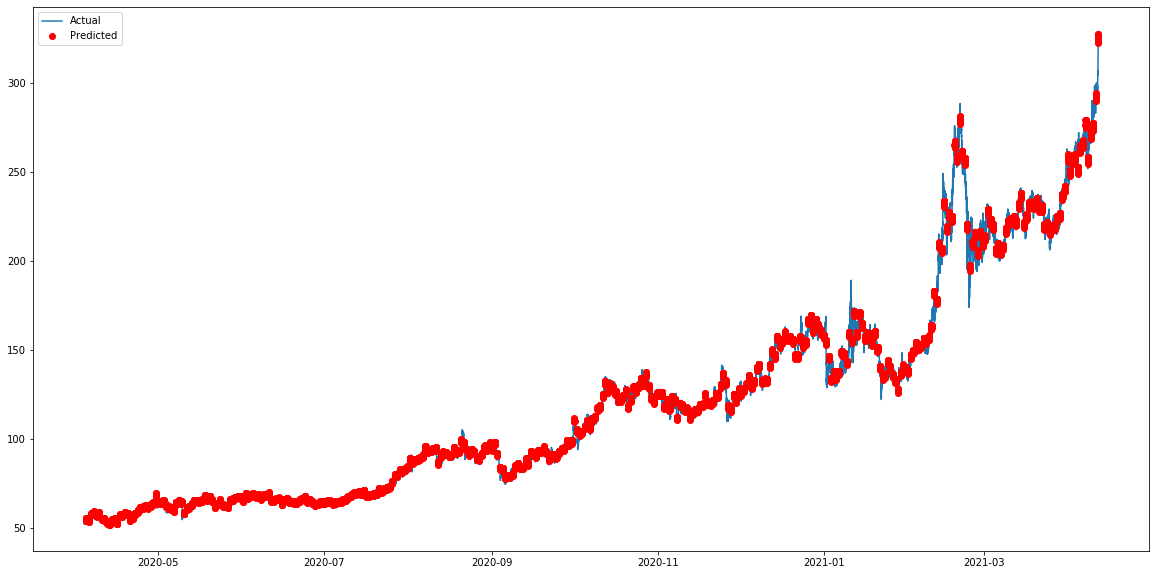

In [6]:
prediction_df_load = prediction_df.loc[(prediction_df["times"].dt.year >= 2020)&(prediction_df["times"].dt.month >= 1),:]
# 
ground_true_df_load = ground_true_df.loc[(ground_true_df["times"].dt.year >= 2020)&(ground_true_df["times"].dt.month >= 1),:]
# 

plt.figure(figsize=(20,10))
plt.plot(ground_true_df_load.times,ground_true_df_load.value, label = 'Actual')
plt.plot(prediction_df_load.times,prediction_df_load.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.savefig('result/monero2016to2021_close_GRU_1_tanh_relu_result.png')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(validation_original_outputs[:,:,0].reshape(-1),predicted_inverted)

2.9886203136647866